In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
data= pd.read_csv('media_prize_money.csv')
df250 = data[data['eventtype'] == 250]
df500 = data[data['eventtype'] == 500]
print(df250)

     eventtype  gruppo  quota_sopra_media
0          250  others             0.0000
1          250  others             0.0000
2          250  others             0.0000
3          250  76_150             0.0526
5          250  others             0.0263
..         ...     ...                ...
471        250  others             0.0526
472        250  76_150             0.0000
474        250  others             0.0000
476        250  76_150             0.1053
478        250  top_75             0.0526

[294 rows x 3 columns]


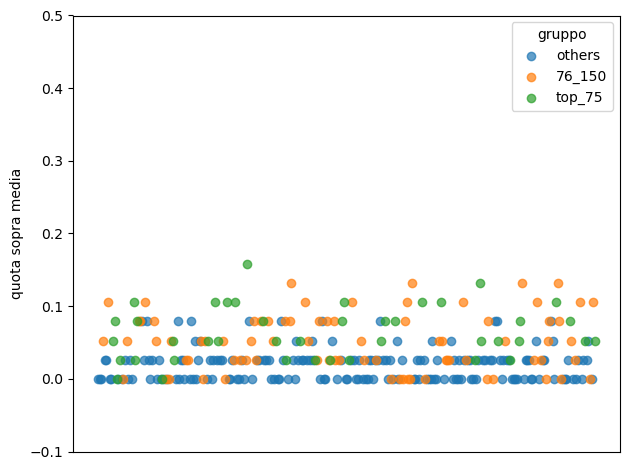

In [22]:
import matplotlib.pyplot as plt

#df250 = df250.sort_values("quota_sopra_media")
# mappatura colori per gruppo
groups = df250["gruppo"].unique()
colors = plt.cm.tab10(range(len(groups)))
color_map = dict(zip(groups, colors))

# asse x fittizio: un punto per riga
x = range(len(df250))

plt.figure()
for g in groups:
    mask = df250["gruppo"] == g
    plt.scatter(
        [i for i in x if mask.iloc[i]],
        df250.loc[mask, "quota_sopra_media"],
        label=g,
        color=color_map[g], alpha=0.7,
    )

plt.ylim(-0.1,0.5)
plt.ylabel("quota sopra media")
plt.xticks([])  # nessun indice sull'asse x
plt.legend(title="gruppo")
plt.tight_layout()
plt.show()


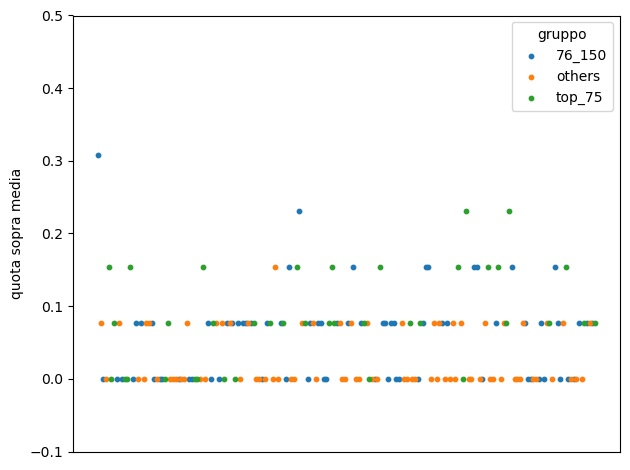

In [9]:
import matplotlib.pyplot as plt

#df250 = df250.sort_values("quota_sopra_media")
# mappatura colori per gruppo
groups = df500["gruppo"].unique()
colors = plt.cm.tab10(range(len(groups)))
color_map = dict(zip(groups, colors))

# asse x fittizio: un punto per riga
x = range(len(df500))

plt.figure()
for g in groups:
    mask = df500["gruppo"] == g
    plt.scatter(
        [i for i in x if mask.iloc[i]],
        df500.loc[mask, "quota_sopra_media"],
        label=g,
        color=color_map[g],
        s=10,
    )

plt.ylim(-0.1,0.5)
plt.ylabel("quota sopra media")
plt.xticks([])  # nessun indice sull'asse x
plt.legend(title="gruppo")
plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt
def boxplot_quota_sopra_media(d):
    groups = ["others","76_150", "top_75"]
    data = [d[d["gruppo"] == g]["quota_sopra_media"] for g in groups]

    plt.figure()

    bp = plt.boxplot(
        data,
        labels=groups,
        patch_artist=True,
        showfliers=True
    )

    colors = ["tab:blue", "tab:orange", "tab:green"]

    for box, color in zip(bp["boxes"], colors):
        box.set(facecolor=color, alpha=0.4)

    for median in bp["medians"]:
        median.set(color="black", linewidth=1.5)

    plt.ylabel("quota sopra media")
    plt.tight_layout()
    plt.show()


C:\Users\lorig\AppData\Local\Temp\ipykernel_75348\2687101440.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


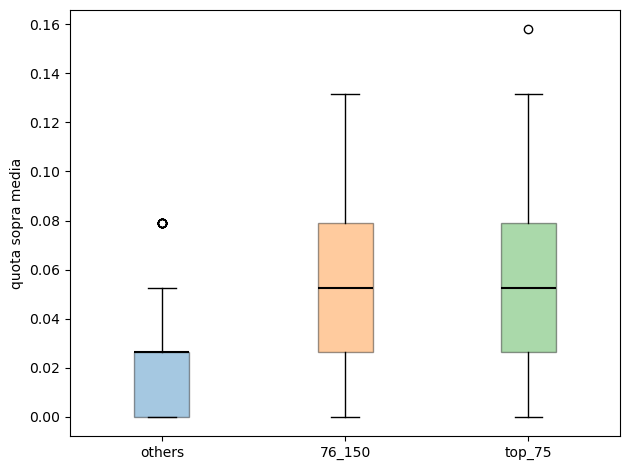

C:\Users\lorig\AppData\Local\Temp\ipykernel_75348\2687101440.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


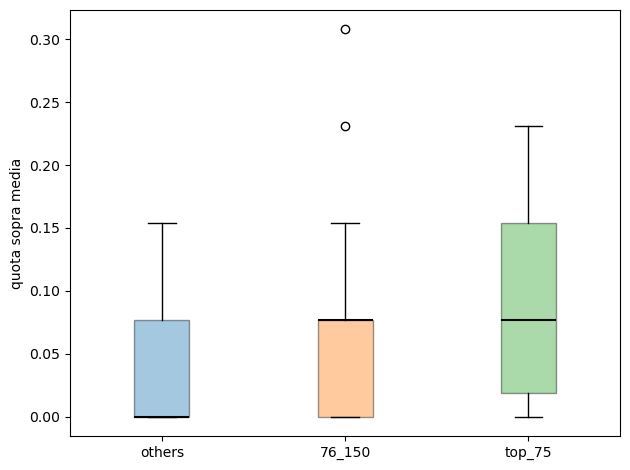

In [26]:
boxplot_quota_sopra_media(df250)
boxplot_quota_sopra_media(df500)

C:\Users\lorig\AppData\Local\Temp\ipykernel_75348\1711003774.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  violin = sns.violinplot(


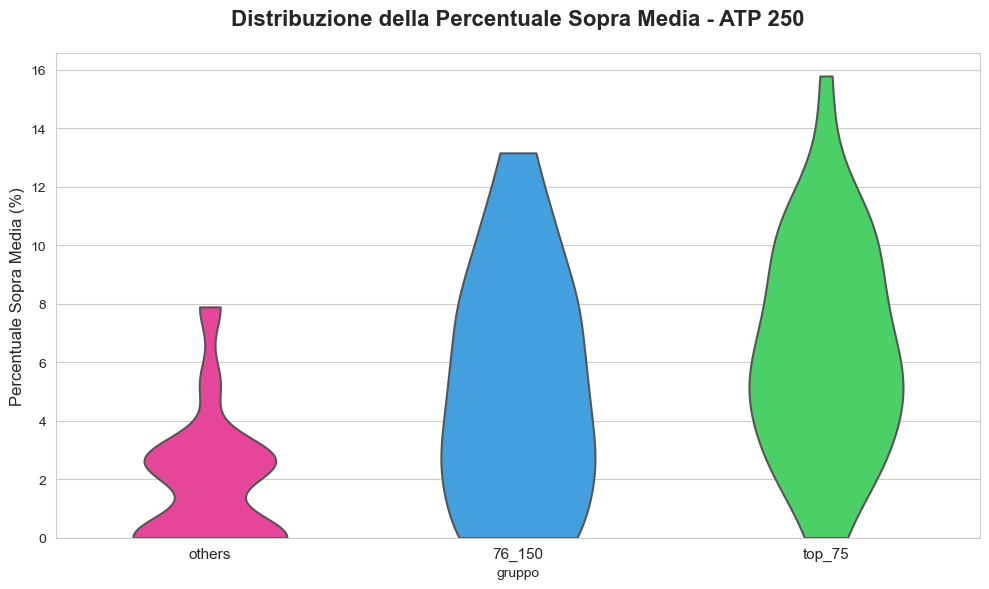

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supponendo che i dati siano già in un DataFrame chiamato df
# Selezioniamo solo i dati per ATP250
df_250 = df250[df250['eventtype'] == 250].copy()

# Preparazione dei dati per il violin plot
# Le tre categorie: 'top_75', '76_150', 'others'
# Convertiamo quota_sopra_media in percentuale (da 0 a 100)
df_250['percentuale'] = df_250['quota_sopra_media'] * 100

# Definiamo l'ordine delle categorie per una visualizzazione logica
categorie_order = ['others', '76_150','top_75']
categorie_labels = ['others', '76_150','top_75']

# Creazione del violin plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("husl")

# Creiamo il violin plot
violin = sns.violinplot(
    x='gruppo',
    y='percentuale',
    data=df_250,
    order=categorie_order,
    width=0.5,  # <-- QUESTO RENDE I VIOLIN PIÙ STREtti
    cut=0,
    inner=None,
    linewidth=1.5,
    palette = ["#FF2C9C", "#2AA3F9", '#34E659'])


# Aggiungiamo i punti con jitter per mostrare la distribuzione reale dei dati
# sns.stripplot(
#     x='gruppo',
#     y='percentuale',
#     data=df_250,
#     order=categorie_order,
#     color='black',
#     alpha=0.3,
#     size=4,
#     jitter=True
# )

# Personalizziamo il plot
plt.title('Distribuzione della Percentuale Sopra Media - ATP 250', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Percentuale Sopra Media (%)', fontsize=12)

# Modifichiamo le etichette sull'asse x
plt.xticks(
    ticks=[0, 1, 2],
    labels=categorie_labels,
    fontsize=11
)

# Aggiungiamo linee orizzontali di riferimento
# plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
# plt.axhline(y=5, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
# plt.axhline(y=10, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)

# Aggiungiamo la media per ogni gruppo
# for i, gruppo in enumerate(categorie_order):
#     media = df_250[df_250['gruppo'] == gruppo]['percentuale'].mean()
#     plt.plot(i, media, 'o', color='red', markersize=8, markeredgecolor='white', markeredgewidth=1)


# # Aggiungiamo una tabella con le statistiche riassuntive
# stats_data = []
# for gruppo in categorie_order:
#     gruppo_data = df_250[df_250['gruppo'] == gruppo]['percentuale']
#     stats_data.append([
#         f'{gruppo_data.mean():.1f}%',
#         f'{gruppo_data.median():.1f}%',
#         f'{gruppo_data.std():.1f}%',
#         len(gruppo_data)
#     ])



# Regoliamo il layout per far spazio alla tabella
plt.subplots_adjust(bottom=0.35)

# # Aggiungiamo annotazioni
# plt.text(0.02, 0.98, 'ATP 250 Tournament',
#          transform=plt.gca().transAxes,
#          fontsize=10,
#          verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.ylim(0)
plt.tight_layout()
plt.show()
